In [1]:
!pip install mlflow

In [2]:
import mlflow
mlflow.set_tracking_uri("http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/")
with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 1)

🏃 View run unequaled-finch-119 at: http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/#/experiments/0/runs/ba90af2d2d1248808cb50ab15ec40fa0
🧪 View experiment at: http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/#/experiments/0


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jatin-agrawal17/Youtube-Chrome_plugin/main/data/reddit.csv")
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.dropna(inplace = True)

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df = df[~(df['clean_comment'].str.strip()=='')]

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
def preprocess_comment(comment):
  comment = comment.lower()
  comment = comment.strip()
  comment = re.sub(r'\n' , ' ',comment)
  comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)
  stop_words = set(stopwords.words('english'))-{'not', 'but', 'however', 'no', 'yet'}
  comment = ' '.join([word for word in comment.split() if word not in stop_words])
  lemmatizer = WordNetLemmatizer()
  comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])
  return comment

In [9]:
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)

In [10]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [11]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
vectorizer = CountVectorizer(max_features=5000)

In [13]:
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
X.shape

(36793, 5000)

In [16]:
y

,category
0,1
1,1
2,-1
3,0
4,1
...,...
37244,0
37245,1
37246,0
37247,1


In [17]:
y.shape

(36793,)

In [18]:
mlflow.set_tracking_uri("http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/")

In [19]:
mlflow.set_experiment("RF Baseline")

<Experiment: artifact_location='s3://jatin-mlflow-tracking-2025/921943931991143955', creation_time=1765921004017, experiment_id='921943931991143955', last_update_time=1765921004017, lifecycle_stage='active', name='RF Baseline', tags={}>

In [20]:
!pip install boto3

In [21]:
!pip install awscli

In [ ]:
!aws configure

2025/12/16 22:01:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/#/experiments/921943931991143955/runs/96156ab27a6347219a1bff3d8005766d
🧪 View experiment at: http://ec2-100-31-158-149.compute-1.amazonaws.com:5000/#/experiments/921943931991143955
Accuracy: 0.651039543416225


<Figure size 800x600 with 0 Axes>

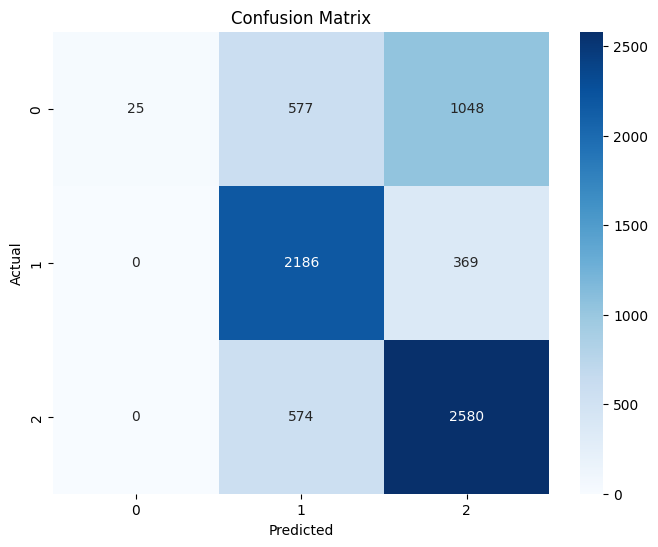

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

with mlflow.start_run() as run:
  mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
  mlflow.set_tag("experiment_type", "baseline")
  mlflow.set_tag("model_type", "Random ForestClassifier")
  mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (Bow) with a simple train-test split")
  mlflow.log_param("vectorizer_type", "CountVectorizer")
  mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

  n_estimators = 150
  max_depth=15
  mlflow.log_param("n_estimators", n_estimators)
  mlflow.log_param("max_depth", max_depth)

  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  mlflow.log_metric("accuracy", accuracy)
  classification_rep = classification_report(y_test, y_pred, output_dict=True)
  for label, metrics in classification_rep.items():
    if isinstance(metrics, dict):
      for metric, value in metrics.items():
        mlflow.log_metric(f"{label}_{metric}", value)
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8,6))
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")

  plt.savefig("confusion_matrix.png")
  mlflow.log_artifact("/content/confusion_matrix.png")
  mlflow.sklearn.log_model (model, "random_forest_model")

  df.to_csv("dataset.csv", index=False)
  mlflow.log_artifact("/content/dataset.csv")
print(f"Accuracy: {accuracy}")

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.02      0.03      1650
           0       0.66      0.86      0.74      2555
           1       0.65      0.82      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.50      7359
weighted avg       0.73      0.65      0.57      7359

